# Mycobacteria

A notebook for the exploration of Mycobacteria.

Note that we use our data from the Autoencoding for this, but we have already calculated and stored that data so we can reload it here!

## Set up and reading the data

In [49]:
import os
import sys
from socket import gethostname

hostname = gethostname()

if hostname.startswith('hpc-node'):
    IN_DEEPTHOUGHT = True
    sys.path.append('..')
else:
    IN_DEEPTHOUGHT = False
from cf_analysis_lib.load_libraries import *
import cf_analysis_lib


In [50]:
import shap

In [51]:
sequence_type = "MGI"
datadir = '..'
sslevel = 'subsystems_norm_ss.tsv.gz'
taxa = "family"

df, metadata = cf_analysis_lib.read_the_data(sequence_type, datadir, sslevel=sslevel, taxa=taxa)
print(f"The data frame has shape {df.shape}")

The data frame has shape (127, 1512)


In [52]:
outdir = 'mycobacteria'
os.makedirs(outdir, exist_ok=True)

## Make a boxplot

In [54]:
for c in df.columns:
    if 'myco' in c.lower():
        print(c)

Biosynthesis of Arabinogalactan in Mycobacteria
Cell wall-associated cluster in Mycobacterium
ESAT-6 protein secretion system in Mycobacteria (locus ESX-5)
ESAT-6 proteins secretion system in Mycobacteria (locus ESX-1)
ESAT-6 proteins secretion system in Mycobacteria (locus ESX-3)
ESAT-6 proteins secretion system in Mycobacteria (locus ESX-4)
Galactosamine Substituent of Arabinogalactan in Mycobacteria
Glutathione analogs: mycothiol
Mycobacterial FadD proteins (fatty acid CoA- and AMP- ligases)
Mycobacterial FadE proteins Acyl-CoA dehydrogenase
Mycobacterial HadABC proteins ((3R)-hydroxyacyl-ACP dehydrates of FASII)
Mycobacterial cell wall virulence lipid phthiocerol dimycocerosate (PDIM)
Mycobacterial gene cluster associated with resistance against FAS-II antibiotics
Mycobacterial heme acquisition system
Mycobacterial lipid and multidrug efflux system proteins MmpL, MmpS
Mycobacterial lipoproteins (LPR group)
Mycobacterial multidrug efflux systems implicated in AMR 
Mycobacterial sign

In [57]:
myco = metadata[['NTM',
                 'CS_Mycobacteroides abscessus', 'CS_Mycobacterium intracellulare', 'CS_NTM_(Smear negative)', 'CS_MAC_(Smear negative)',
                 'O_Mycobacterium abscessus', 'O_Mycobacterium intracellular', 'O_Mycobacterium mucogenicum', 'O_Mycobacterium scotochromogen', 
                 'P12M_4_Rapid NTM', 'P12M_5_Slow NTM',
                 'N12M_MAC'
                ]].fillna(0).copy()
merged = df[['Mycobacteriaceae']].join(myco)
merged

,Mycobacteriaceae,NTM,CS_Mycobacteroides abscessus,CS_Mycobacterium intracellulare,CS_NTM_(Smear negative),CS_MAC_(Smear negative),O_Mycobacterium abscessus,O_Mycobacterium intracellular,O_Mycobacterium mucogenicum,O_Mycobacterium scotochromogen,P12M_4_Rapid NTM,P12M_5_Slow NTM,N12M_MAC
1068841_20180306_S,852.495618,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1447437_20171212_S,673.091652,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1128691_20171206_S,612.738511,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1128691_20171218_S,541.690413,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1128691_20180116_S,619.114510,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895293_20180502_S,740.122586,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
896213_20180427_S,1286.394580,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
913873_20180417_S,1623.254058,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
980574_20180403_S,997.364482,0.0,0,0,0,0,0,0,0,0,0.0,0.0,1.0


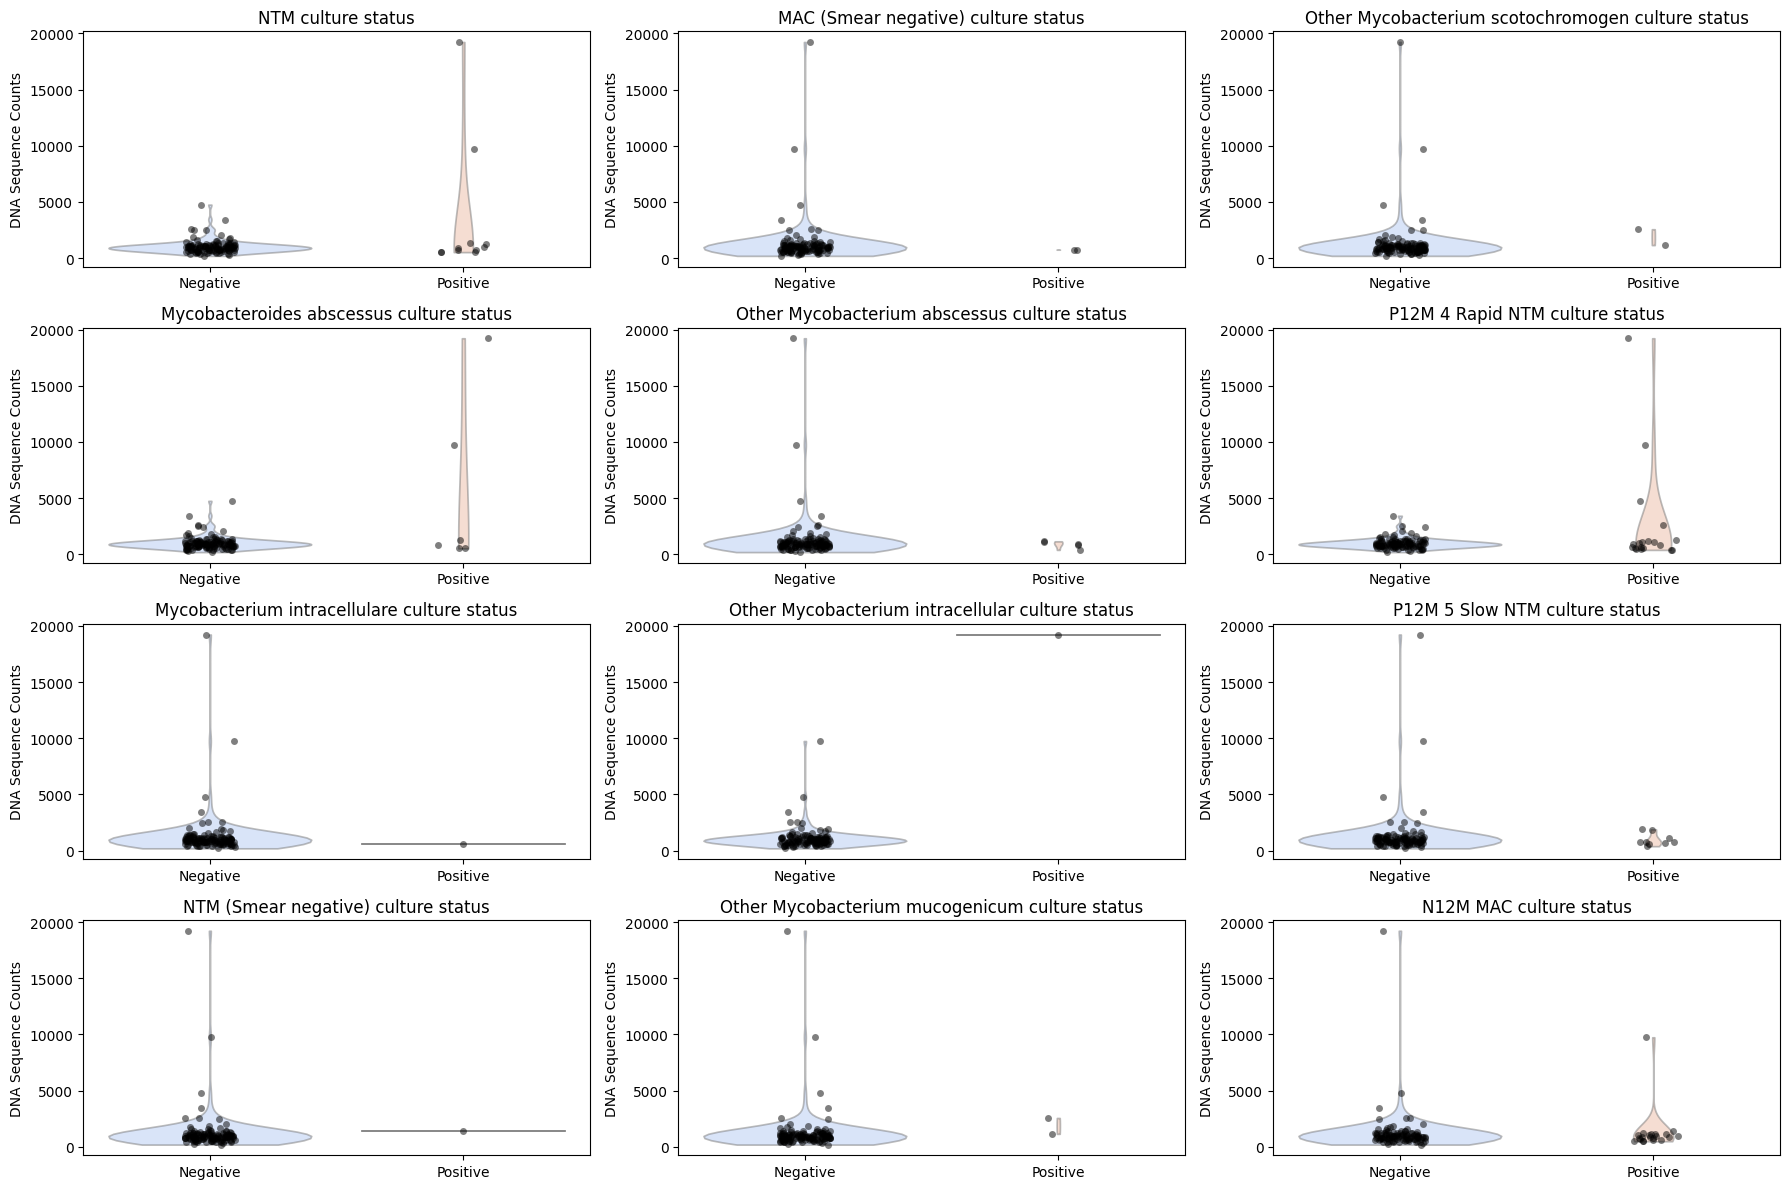

In [69]:
fig, ax = plt.subplots(figsize=(18, 12), nrows=4, ncols=3, sharex=False, sharey=False)

y='Mycobacteriaceae'
k = 0
for i in [0, 1, 2]:
    for j in [0, 1, 2, 3]:
        culture_taxa = myco.columns[k]
        ctitle = culture_taxa.replace('O_', 'Other ').replace('CS_', '').replace('_', ' ')
        g = sns.violinplot(x=culture_taxa, y=y, data=merged, hue=culture_taxa, palette='coolwarm', alpha=0.5, ax=ax[j][i], legend=False, inner=None, density_norm='count', common_norm=True, cut=0)
        g = sns.stripplot(x=culture_taxa, y=y, data=merged, color='black', jitter=True, alpha=0.5, ax=ax[j][i], legend=False)
        g.set_xlabel("")
        g.set_ylabel("DNA Sequence Counts")
        g.set_xlim(-0.5, 1.5)
        g.set_xticks(ticks=[0, 1], labels=["Negative", "Positive"])
        g.set_title(f"{ctitle} culture status")
        k+=1
        

plt.tight_layout()
plt.show()

### Read the autoencoder

In [5]:
encoder_models = 'cluster_gbrfs'
if not os.path.exists(os.path.join(encoder_models, 'clusters.json')):
    print("Please run the autoencoder code before trying to load the models.", file=sys.stderr)
    exit(1)

if not os.path.exists(os.path.join(encoder_models, 'pc_df.tsv')):
    print("Please create and save the PCA before trying to load the models.", file=sys.stderr)
    exit(1)

with open(os.path.join(encoder_models, 'clusters.json'), 'r') as file:
    data = json.load(file)
tmpjsondf = pd.DataFrame(list(data.items()), columns=['Cluster', 'Feature'])
cluster_assignments = tmpjsondf.explode('Feature').reset_index(drop=True)
cluster_assignments['Cluster'] = cluster_assignments['Cluster'].astype(int)

pc_df = pd.read_csv(os.path.join(encoder_models, 'pc_df.tsv'), sep="\t", index_col=0)

## Which metadata columns are Mycobacteria?

In [6]:
for c in metadata.columns:
    if 'mac' in c.lower():
        print(c)

CS_MAC_(Smear negative)
N12M_MAC


### Who has what?

This table shows which of our patients has Mycobacteria, and we make a single column, _Mycobacteria_, for any of the observations. 

In [7]:
myco = metadata[['NTM',
                 'CS_Mycobacteroides abscessus', 'CS_Mycobacterium intracellulare', 'CS_NTM_(Smear negative)', 'CS_MAC_(Smear negative)',
                 'O_Mycobacterium abscessus', 'O_Mycobacterium intracellular', 'O_Mycobacterium mucogenicum', 'O_Mycobacterium scotochromogen', 
                 'P12M_4_Rapid NTM', 'P12M_5_Slow NTM',
                 'N12M_MAC'
                ]].fillna(0).copy()
myco

,NTM,CS_Mycobacteroides abscessus,CS_Mycobacterium intracellulare,CS_NTM_(Smear negative),CS_MAC_(Smear negative),O_Mycobacterium abscessus,O_Mycobacterium intracellular,O_Mycobacterium mucogenicum,O_Mycobacterium scotochromogen,P12M_4_Rapid NTM,P12M_5_Slow NTM,N12M_MAC
NAME,,,,,,,,,,,,
1068841_20180306_S,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1085876_20180227_S,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1128691_20171206_S,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1128691_20171218_S,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1128691_20180116_S,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
895293_20180502_S,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
896213_20180427_S,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
913873_20180417_S,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0


In [64]:
myco = metadata[['NTM',
                 'CS_Mycobacteroides abscessus', 'CS_Mycobacterium intracellulare', 'CS_NTM_(Smear negative)', 'CS_MAC_(Smear negative)',
                 'O_Mycobacterium abscessus', 'O_Mycobacterium intracellular', 'O_Mycobacterium mucogenicum', 'O_Mycobacterium scotochromogen', 
                 'P12M_4_Rapid NTM', 'P12M_5_Slow NTM',
                 'N12M_MAC'
                ]].fillna(0).copy()
"""
myco = metadata[['CS_Mycobacteroides abscessus', 'O_Mycobacterium abscessus']].copy()
myco = metadata[['CS_Mycobacteroides abscessus']].copy()

myco = metadata[['CS_Mycobacteroides abscessus', 'CS_MAC_(Smear negative)', 'O_Mycobacterium abscessus', 'P12M_5_Slow NTM', 'N12M_MAC']].fillna(0).copy()
"""


myco['Mycobacteria_sum'] = myco.astype(int).sum(axis=1)
myco['Mycobacteria'] = myco['Mycobacteria_sum'] > 0

myco[myco['Mycobacteria']].to_csv('mycobacteria/mycobacteria.tsv', sep="\t")

metadata['Mycobacteria'] = myco['Mycobacteria'].astype(int).astype('category')
# metadata['Mycobacteria'] = myco['Mycobacteria'].astype(int)
# metadata[metadata['Mycobacteria'] == 1]
myco[myco['Mycobacteria']]

,NTM,CS_Mycobacteroides abscessus,CS_Mycobacterium intracellulare,CS_NTM_(Smear negative),CS_MAC_(Smear negative),O_Mycobacterium abscessus,O_Mycobacterium intracellular,O_Mycobacterium mucogenicum,O_Mycobacterium scotochromogen,P12M_4_Rapid NTM,P12M_5_Slow NTM,N12M_MAC,Mycobacteria_sum,Mycobacteria
NAME,,,,,,,,,,,,,,
1162967_20180116_S,1.0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,2,True
642660_20180601_S,1.0,1,1,0,0,0,0,0,0,1.0,1.0,1.0,6,True
650003_20180207_S,0.0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,2,True
650003_20180213_S,0.0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,2,True
658355_20170925_S,0.0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1,True
658355_20171204_S,0.0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1,True
658355_20180122_S,0.0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1,True
670829_20170922_S,0.0,0,0,0,0,1,0,0,0,1.0,0.0,1.0,3,True
670829_20171001_S,1.0,1,0,0,0,1,0,0,0,1.0,0.0,1.0,5,True


## Run the Gradient Boosted Random Forest

We used 506 estimators for the random forest classifier


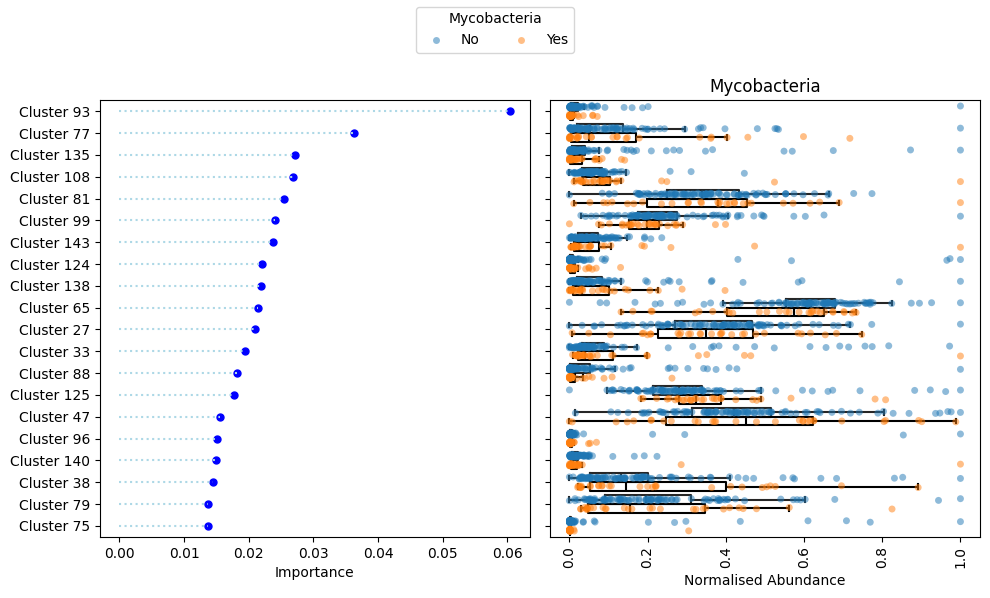

In [9]:
intcol = 'Mycobacteria'

intcol_title = replace_index.sub('', intcol).replace('_', ' ')
merged_df = pc_df.join(metadata[[intcol]]).dropna(subset=intcol)

categorical_data, custom_labels = cf_analysis_lib.create_custom_labels(metadata, intcol, merged_df)

X = merged_df.drop(intcol, axis=1)
y = merged_df[intcol]

if categorical_data:
  model, mse, feature_importances_sorted = cf_analysis_lib.gb_classifier_model(X, y, n_estimators=1000, n_iter_no_change=20)
  met = 'classifier'
else:
  model, mse, feature_importances_sorted = cf_analysis_lib.gb_regressor_model(X, y)
  met = 'regressor'

print(f"We used {model.n_estimators_} estimators for the random forest {met}", file=sys.stderr)
cf_analysis_lib.plot_one_top_feature(merged_df, feature_importances_sorted, intcol, intcol_title, custom_labels)

## Use SHAP to find the features that are important for the presence of something

Right now the GBRF is agnostic to whether an important feature is associated with presence (1) or absence (0) — it just finds features that split the data well.

Here, we loook for things positively associated with 1.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def rank_presence_indicators(
    model,
    X: pd.DataFrame,
    positive_label=1,
    output_space: str = "probability",  # "probability" (uses interventional) or "raw" (log-odds, fast)
    top_n = None,
    return_values: bool = False
):
    """
    Rank features by how strongly they push predictions toward the *presence* class.

    Parameters
    ----------
    model : fitted classifier (e.g., sklearn.GradientBoostingClassifier)
    X : pandas.DataFrame used for training (same columns/order)
    positive_label : which class to treat as "presence" (default=1)
    output_space : "probability" (slower; additive in prob space) or "raw" (log-odds; faster)
    top_n : if set, return only the top N features
    return_values : if True, also return the SHAP array used for presence

    Returns
    -------
    ranked_df : DataFrame with columns:
        - feature
        - mean_shap_for_presence (signed; probability or log-odds)
        - abs_mean_shap
    (optional) shap_presence : np.ndarray of SHAP values used to compute the ranking
    """

    # Map presence label to model class index
    classes = np.asarray(model.classes_)
    if positive_label not in classes:
        raise ValueError(f"positive_label {positive_label!r} not in model.classes_: {classes}")
    pos_idx = int(np.where(classes == positive_label)[0][0])

    # Configure explainer safely
    if output_space == "probability":
        explainer = shap.TreeExplainer(
            model,
            model_output="raw",
            feature_perturbation="interventional",  # required for probability output
        )
    elif output_space == "raw":
        # Fast path (tree_path_dependent); values are in log-odds
        explainer = shap.TreeExplainer(model)
    else:
        raise ValueError('output_space must be "probability" or "raw"')

    shap_values = explainer.shap_values(X)

    # Normalize shapes:
    # - Multiclass: list of arrays, one per class -> pick pos_idx
    # - Binary:
    #   * "probability": newer SHAP typically returns a list [class0, class1]; pick pos_idx
    #   * Sometimes returns a single array for P(last_class); if presence != last class, flip sign
    #   * "raw": often a single array of log-odds; direction is toward the model's positive output
    if isinstance(shap_values, list):
        shap_presence = shap_values[pos_idx]  # shape (n_samples, n_features)
    else:
        shap_presence = shap_values  # shape (n_samples, n_features)
        if output_space == "probability":
            # Probability single-array case corresponds to last class
            if pos_idx != (len(classes) - 1):
                shap_presence = -shap_presence
        else:
            # Raw log-odds single-array: sign already indicates move toward the model's raw output
            # (which corresponds to the last class). Flip if presence is not the last class.
            if pos_idx != (len(classes) - 1):
                shap_presence = -shap_presence

    mean_shap_presence = shap_presence.mean(axis=0)

    ranked_df = pd.DataFrame({
        "feature": X.columns,
        "mean_shap_for_presence": mean_shap_presence
    })
    ranked_df["abs_mean_shap"] = ranked_df["mean_shap_for_presence"].abs()
    ranked_df = ranked_df.sort_values(
        ["mean_shap_for_presence", "abs_mean_shap"],
        ascending=[False, False]
    ).reset_index(drop=True)

    if top_n is not None:
        ranked_df = ranked_df.head(top_n).reset_index(drop=True)

    return (ranked_df, shap_presence) if return_values else ranked_df


presence_rank = rank_presence_indicators(model, X_train, positive_label=1, top_n=25)
print(presence_rank)


        feature  mean_shap_for_presence  abs_mean_shap
0    Cluster 93                0.026820       0.026820
1   Cluster 143                0.007531       0.007531
2    Cluster 77                0.007183       0.007183
3    Cluster 27                0.004096       0.004096
4   Cluster 114                0.003523       0.003523
5   Cluster 103                0.003376       0.003376
6   Cluster 135                0.003259       0.003259
7    Cluster 34                0.003009       0.003009
8    Cluster 25                0.003002       0.003002
9   Cluster 136                0.002705       0.002705
10  Cluster 144                0.002583       0.002583
11   Cluster 42                0.002310       0.002310
12  Cluster 140                0.002206       0.002206
13  Cluster 108                0.002196       0.002196
14   Cluster 26                0.002102       0.002102
15   Cluster 71                0.001885       0.001885
16   Cluster 44                0.001876       0.001876
17   Clust

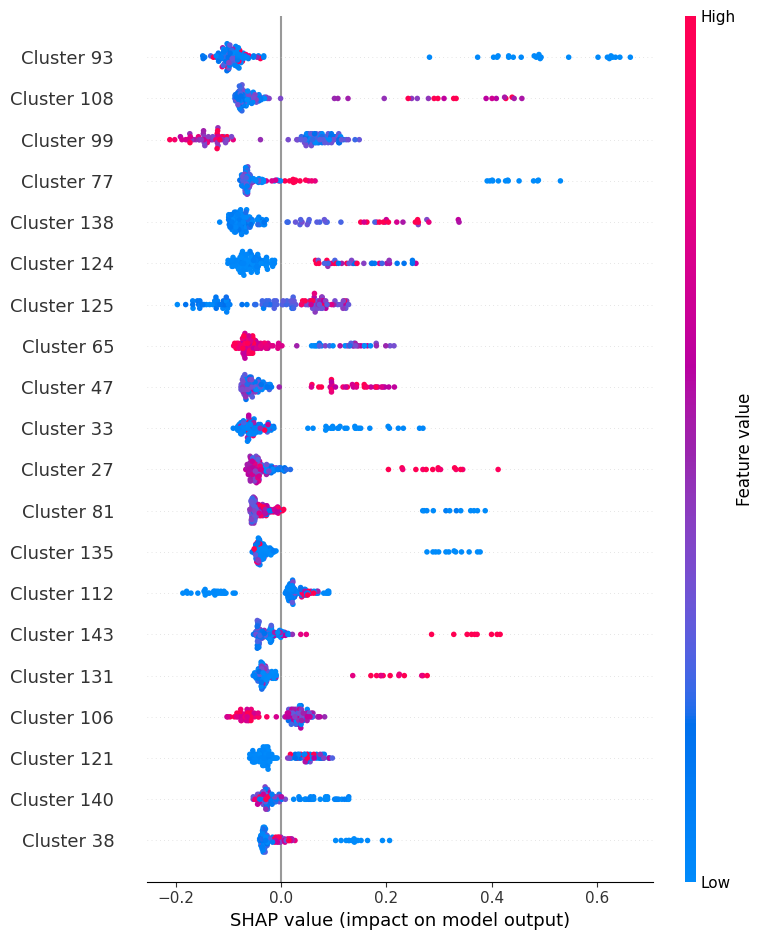

In [39]:
shap.summary_plot(shap_values, X)


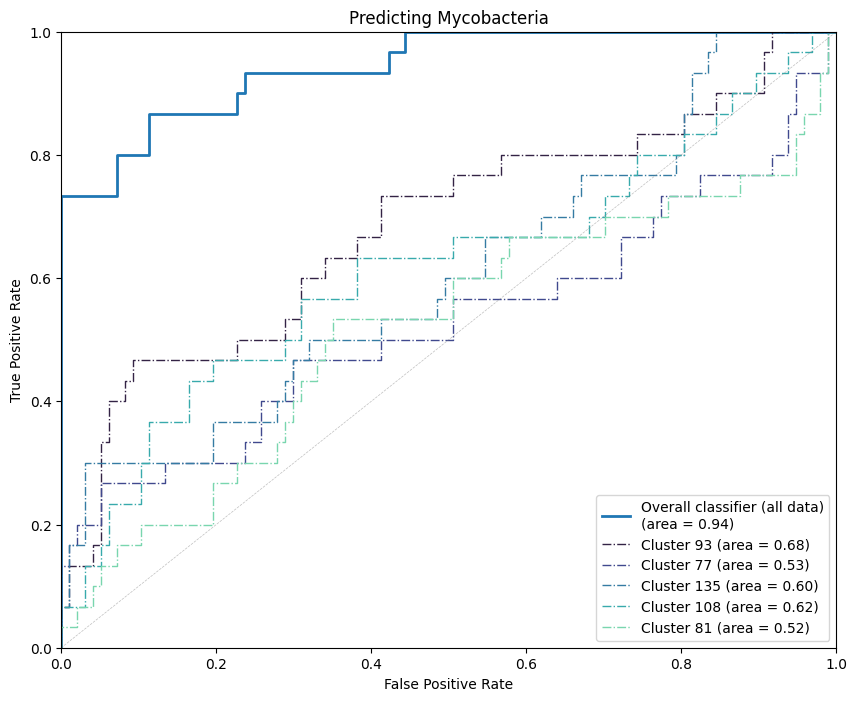

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = cf_analysis_lib.plot_roc_curves(model, X, y, feature_importances_sorted, met, intcol_title, ax=ax)
plt.show()

'Mycobacteria' has samples from 30 pwCF


Wrote the new image to mycobacteria/img/clusters_manual/Mycobacteria_Cluster_137.png


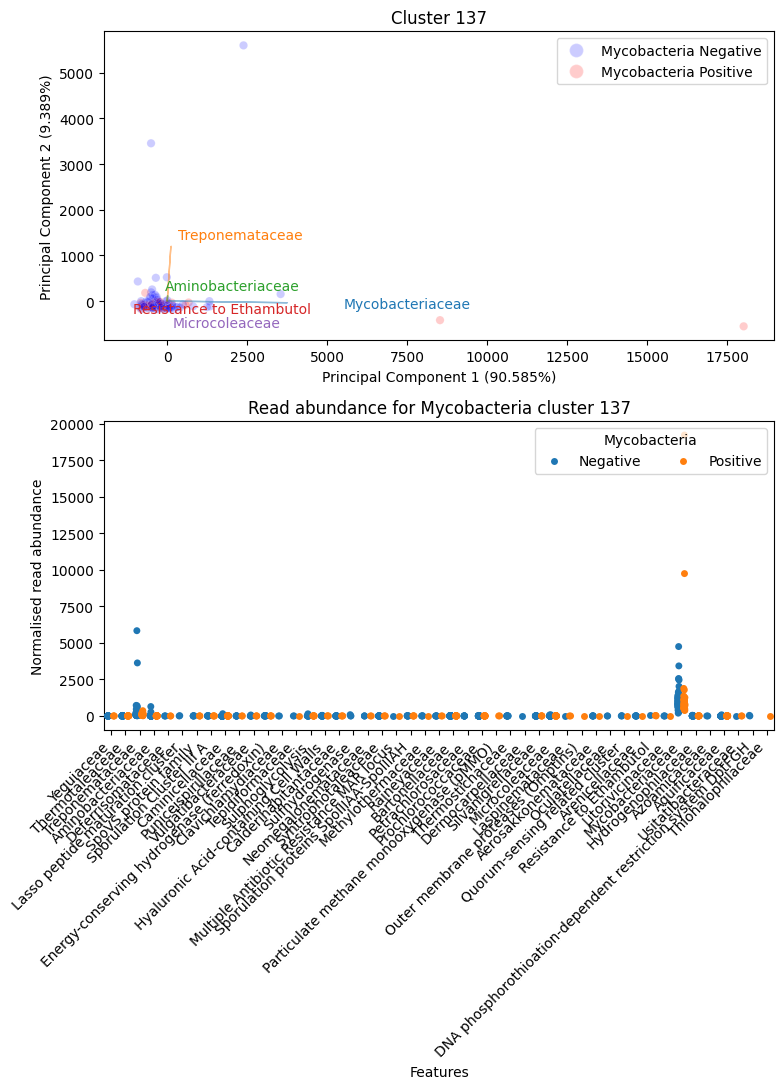

In [48]:
interesting_cluster = 137
print(f"'{intcol}' has samples from {metadata.groupby(intcol).size()[1]} pwCF")

if isinstance(interesting_cluster, int):
    interesting_cluster_filename = f"Cluster_{interesting_cluster}"
elif 'Cluster' in interesting_cluster:
    interesting_cluster_filename = interesting_cluster.replace(" ", "_")
else:
    interesting_cluster_filename = f"Cluster_{interesting_cluster}"
intcol_filename = intcol.replace(" ", "_")
intcol_filename = replace_nonword.sub('', intcol_filename)


# make a new dir so we don't overwrite!
os.makedirs(os.path.join(outdir, "img", "clusters_manual"), exist_ok=True)

pca = PCA(n_components=2)
int_cluster_num = interesting_cluster

df_clust = df[cluster_assignments.loc[cluster_assignments["Cluster"] == int_cluster_num, "Feature"]]
merged_df_clust = df_clust.join(metadata[intcol], how='inner')
df_clust = merged_df_clust.drop(intcol, axis=1)

pca_result = pca.fit_transform(df_clust)
pca_df = pd.DataFrame(data=pca_result, index=df_clust.index, columns=['PC1', 'PC2'])

# Get loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, index=df_clust.columns, columns=['PC1', 'PC2'])

# Create a DataFrame for top loadings
top_loadings_df = loadings_df.loc[loadings_df['PC1'].abs().sort_values(ascending=False).index]
top_loadings_df.head()

explained_variance = pca.explained_variance_ratio_ * 100
pc1_variance = explained_variance[0]
pc2_variance = explained_variance[1]

# don't forget to change the legend
intcol_neg = 0

colours = np.where(merged_df_clust[intcol] == intcol_neg, 'blue', 'red')

# Plot the PCA results
fig, axes = plt.subplots(figsize=(8, 11), nrows=2, ncols=1)
ax = axes[0]
sns.scatterplot(data=pca_df, x='PC1', y='PC2', alpha=0.2, c=colours, ax=ax)
ax.set_title(f"Cluster {interesting_cluster}")
ax.set_xlabel(f'Principal Component 1 ({pc1_variance:.3f}%)')
ax.set_ylabel(f'Principal Component 2 ({pc2_variance:.3f}%)')

# add the loadings ... we only plot maxloadings here
maxloadings = 5
if len(loadings) < maxloadings:
    maxloadings = len(loadings)

plotscaler = 2
texts = []
colour_cycle = cycle(mcolors.TABLEAU_COLORS)


for i in range(maxloadings):
    c = next(colour_cycle)
    xpos = top_loadings_df.iloc[i, 0]*plotscaler
    ypos = top_loadings_df.iloc[i, 1]*plotscaler
    ax.arrow(0, 0, xpos, ypos, 
              color=c, alpha=0.5, width=0.05)
    loading_text = top_loadings_df.index[i]
    if len(loading_text) > 30:
        loading_text = loading_text[:30] + "..."
    texts.append(ax.text(xpos, ypos, loading_text, color=c))

adjust_text(texts, ax=ax)

# Add a legend
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label=f'{intcol} Negative', 
                         markerfacecolor='blue', alpha=0.2, markersize=10)
red_patch = plt.Line2D([0], [0], marker='o', color='w', label=f'{intcol} Positive', 
                        markerfacecolor='red', alpha=0.2, markersize=10)
ax.legend(handles=[blue_patch, red_patch])

## Read abundance
ax = axes[1]

df_clust_m = merged_df_clust.melt(id_vars=intcol, var_name='Features', value_name='Normalised read abundance')
df_clust_m = df_clust_m[df_clust_m['Normalised read abundance'] > 0]

cl = {'IP': 'red', 'OP': 'blue'}
g = sns.stripplot(data=df_clust_m, x='Features', y='Normalised read abundance', hue=intcol, dodge=True, jitter=True, ax=ax)
custom_labels = {0: 'Negative', 1: 'Positive'}
handles, labels = g.get_legend_handles_labels()  # Get one set of handles and labels
updated_labels = [custom_labels[float(label)] for label in labels]
g.get_legend().remove()
g.legend(handles, updated_labels, loc='upper right', ncol=2, title=intcol_title)

ax.tick_params(axis='x', rotation=45)
for label in ax.get_xticklabels():
    label.set_horizontalalignment('right')
ax.set_title(f"Read abundance for {intcol} cluster {interesting_cluster}")


plt.tight_layout()
plt.savefig(os.path.join(outdir, "img", "clusters_manual", f"{intcol_filename}_{interesting_cluster_filename}.png"))
print(f'Wrote the new image to {os.path.join(outdir, "img", "clusters_manual", f"{intcol_filename}_{interesting_cluster_filename}.png")}', file=sys.stderr)
# Show the plot
plt.show()

In [46]:
cluster_assignments[cluster_assignments['Cluster']==93]

,Cluster,Feature
606,93,Siderophore Yersiniabactin Biosynthesis
607,93,Thermonemataceae
608,93,Coat proteins CotJABC
609,93,Fructoselysine and glucoselysine
610,93,Sphaerochaetaceae
611,93,Thiazole.oxazole-modified microcins
612,93,Anthocerotibacteraceae
613,93,Erysipelotrichaceae
614,93,Cerasicoccaceae
615,93,Deferribacteraceae


In [11]:
interesting_cluster = 82
print(f"'{intcol}' has samples from {metadata.groupby(intcol).size()[1]} pwCF")

if isinstance(interesting_cluster, int):
    interesting_cluster_filename = f"Cluster_{interesting_cluster}"
elif 'Cluster' in interesting_cluster:
    interesting_cluster_filename = interesting_cluster.replace(" ", "_")
else:
    interesting_cluster_filename = f"Cluster_{interesting_cluster}"
intcol_filename = intcol.replace(" ", "_")
intcol_filename = replace_nonword.sub('', intcol_filename)

# make a new dir so we don't overwrite!
os.makedirs(os.path.join(outdir, "img", "clusters_manual"), exist_ok=True)

pca = PCA(n_components=2)
int_cluster_num = interesting_cluster

df_clust = df[cluster_assignments.loc[cluster_assignments["Cluster"] == int_cluster_num, "Feature"]]
merged_df_clust = df_clust.join(metadata[metadata['CS_Pseudomonas aeruginosa'] == 1][intcol], how='inner')
merged_df_clust.shape

'CS_MDR_Pseudomonas aeruginosa' has samples from 14 pwCF


(36, 3)

## Converting to Pseudomonas culturable state

We have 36 samples from pwCF who culture negative for Pseudomonas but convert in the next year. We have one sample from someone who was positive for Pseudomonas but was not positive a year later, but that is not enough to draw conclusions. However, we also have 38 samples from people who were culture negative for Pseudomonas and were also culture negative a year later.

Lets subset the data to people who are Pseudomonas negative, and then see if we can predict a driver towards positivity.

In [12]:
# pwCF who are positive but not later on
metadata[(metadata['CS_Pseudomonas aeruginosa'] == 1) & (metadata['N12M_Pseudomonas aeruginosa'] == 0)][['CS_Pseudomonas aeruginosa', 'N12M_Pseudomonas aeruginosa']]

,CS_Pseudomonas aeruginosa,N12M_Pseudomonas aeruginosa
NAME,,
715927_20180213_S,1,0.0


In [13]:
# pwCF who are Pseudo negative and then become positive.
metadata[(metadata['CS_Pseudomonas aeruginosa'] == 0) & (metadata['N12M_Pseudomonas aeruginosa'] == 1)][['CS_Pseudomonas aeruginosa', 'N12M_Pseudomonas aeruginosa']]

,CS_Pseudomonas aeruginosa,N12M_Pseudomonas aeruginosa
NAME,,
1068841_20180306_S,0,1.0
1586713_20180309_S,0,1.0
1590009_20171212_S,0,1.0
1651490_20171010_S,0,1.0
1651490_20171215_S,0,1.0
1651490_20180206_S,0,1.0
642660_20180601_S,0,1.0
650003_20180213_S,0,1.0
658355_20170925_S,0,1.0


'N12M_Pseudomonas aeruginosa' has samples from 71 pwCF


We dropped some rows, so our data has shape (74, 151)
We used 11 estimators for the random forest classifier
Mean squared error for N12M_Pseudomonas aeruginosa using classifier is 0.6666666666666666


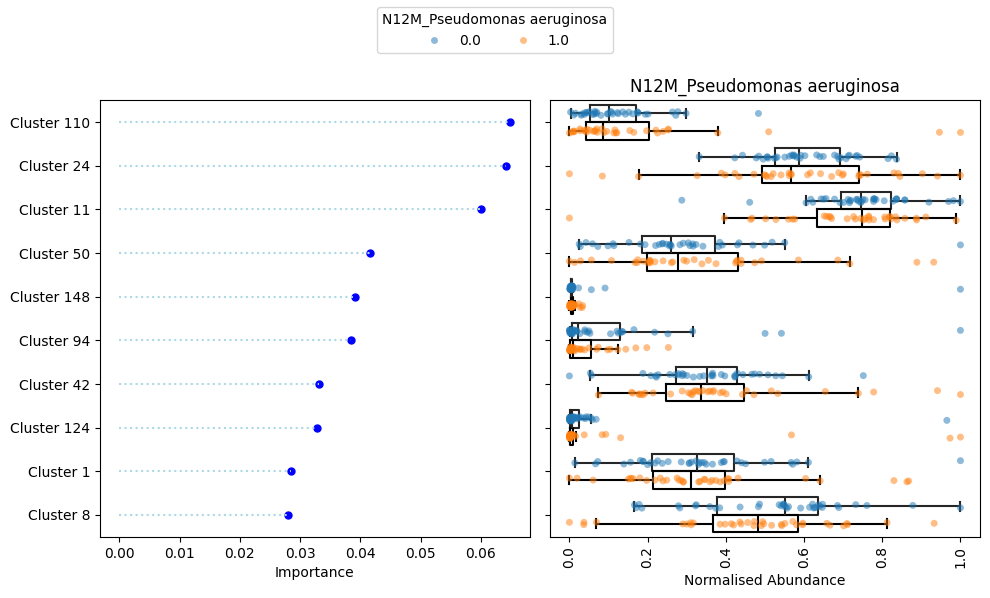

In [14]:
intcol = 'N12M_Pseudomonas aeruginosa'
print(f"'{intcol}' has samples from {metadata.groupby(intcol).size()[1]} pwCF")

n_estimators=1000

# set up our titles and the filename
intcol_title = replace_index.sub('', intcol)
intcol_filename = intcol.replace(" ", "_")

# we limit this to only those samples that ALSO have Pseudomonas, so now we can see if any clusters discriminate regular from MDR Pseudomonas.
merged_df = pc_df.join(metadata[metadata['CS_Pseudomonas aeruginosa'] == 0][intcol], how='inner').dropna(subset=intcol)
print(f"We dropped some rows, so our data has shape {merged_df.shape}", file=sys.stderr)

categorical_data, custom_labels = cf_analysis_lib.create_custom_labels(metadata, intcol, merged_df)
if categorical_data is None:
    print(f"Error: {intcol} is not a numeric or categorical column. Skipped", file=sys.stderr)

X = merged_df.drop(intcol, axis=1)
y = merged_df[intcol]

met = None
if categorical_data:
  model, mse, feature_importances_sorted = cf_analysis_lib.gb_classifier_model(X, y)
  met = 'classifier'
else:
  model, mse, feature_importances_sorted = cf_analysis_lib.gb_regressor_model(X, y)
  met = 'regressor'

print(f"We used {model.n_estimators_} estimators for the random forest {met}", file=sys.stderr)
print(f"Mean squared error for {intcol} using {met} is {mse}", file=sys.stderr)

y_features = 10
topN = list(feature_importances_sorted[:y_features].index) + [intcol]
fig, axes = plt.subplots(figsize=(10, 6), nrows=1, ncols=2, sharey='row', sharex='col')
cf_analysis_lib.plot_feature_importance(axes[0], feature_importances_sorted[:y_features][::-1], "")
cf_analysis_lib.plot_feature_abundance(axes[1], merged_df[topN][::-1], intcol, intcol_title)

handles, labels = axes[1].get_legend_handles_labels()  # Get one set of handles and labels
updated_labels = labels
try:
    updated_labels = [custom_labels[float(label)] for label in labels]
except Exception as e:
    print(f"Couldn't update labels {e}.", file=sys.stderr)

for ax in axes.flat:
    if ax.get_legend() is not None:  # Check if legend exists
        ax.get_legend().remove()

plt.xticks(rotation=90)
fig.legend(handles, updated_labels, loc='upper center', ncol=2, title=intcol_title)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


## ROC Curve for predicting N12M

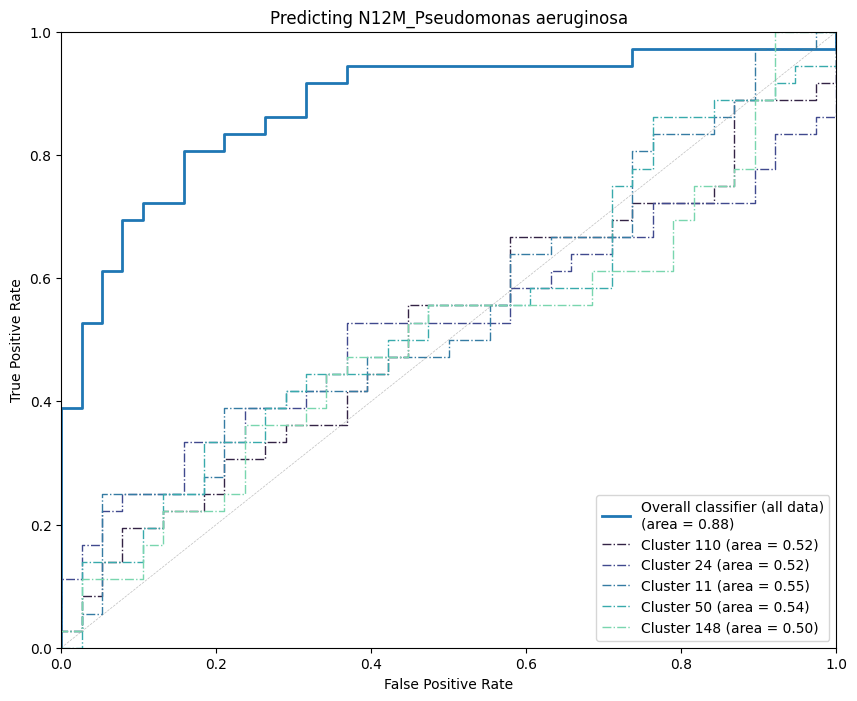

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = cf_analysis_lib.plot_roc_curves(model, X, y, feature_importances_sorted, met, intcol_title, ax=ax)
plt.show()

'N12M_Pseudomonas aeruginosa' has samples from 71 pwCF


Wrote the new image to pseudomonas/img/clusters_manual/N12M_Pseudomonas_aeruginosa_Cluster_18.png


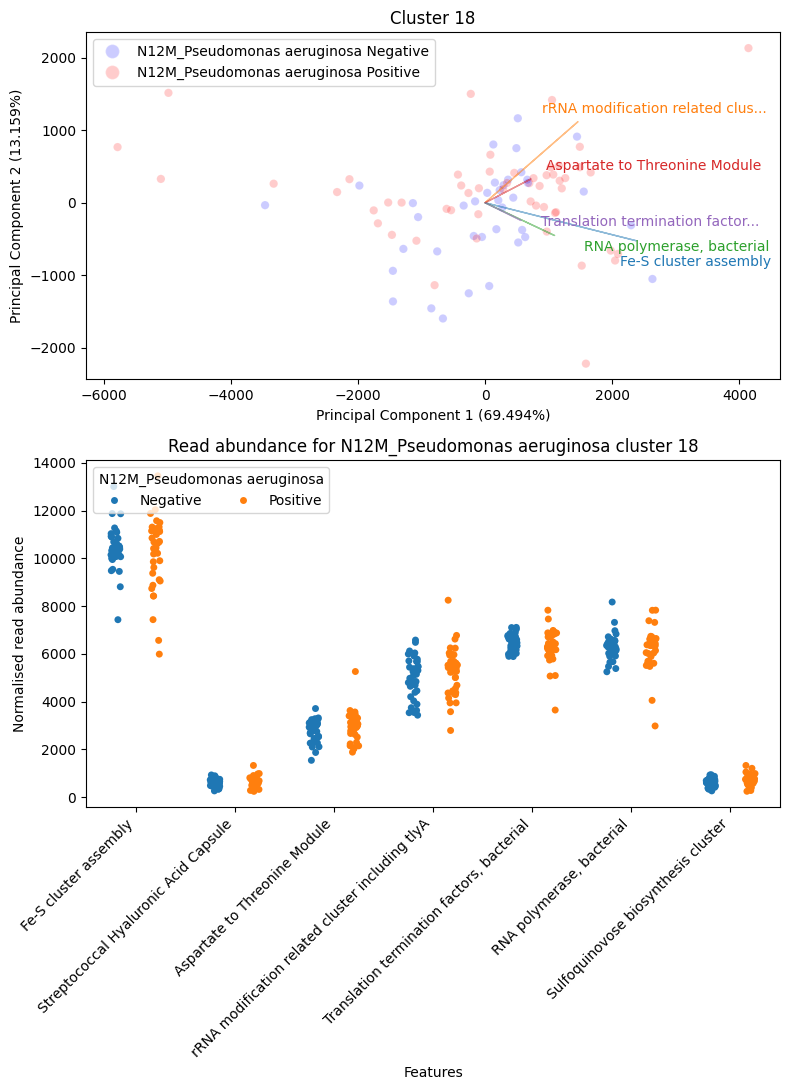

In [16]:
interesting_cluster = 18
print(f"'{intcol}' has samples from {metadata.groupby(intcol).size()[1]} pwCF")

if isinstance(interesting_cluster, int):
    interesting_cluster_filename = f"Cluster_{interesting_cluster}"
elif 'Cluster' in interesting_cluster:
    interesting_cluster_filename = interesting_cluster.replace(" ", "_")
else:
    interesting_cluster_filename = f"Cluster_{interesting_cluster}"
intcol_filename = intcol.replace(" ", "_")
intcol_filename = replace_nonword.sub('', intcol_filename)


# make a new dir so we don't overwrite!
os.makedirs(os.path.join(outdir, "img", "clusters_manual"), exist_ok=True)

pca = PCA(n_components=2)
int_cluster_num = interesting_cluster

df_clust = df[cluster_assignments.loc[cluster_assignments["Cluster"] == int_cluster_num, "Feature"]]
# limit to only those that also have Pseudomonas
merged_df_clust = df_clust.join(metadata[metadata['CS_Pseudomonas aeruginosa'] == 0][intcol], how='inner')
df_clust = merged_df_clust.drop(intcol, axis=1)

pca_result = pca.fit_transform(df_clust)
pca_df = pd.DataFrame(data=pca_result, index=df_clust.index, columns=['PC1', 'PC2'])

# Get loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, index=df_clust.columns, columns=['PC1', 'PC2'])

# Create a DataFrame for top loadings
top_loadings_df = loadings_df.loc[loadings_df['PC1'].abs().sort_values(ascending=False).index]
top_loadings_df.head()

explained_variance = pca.explained_variance_ratio_ * 100
pc1_variance = explained_variance[0]
pc2_variance = explained_variance[1]

# don't forget to change the legend
intcol_neg = 0

colours = np.where(merged_df_clust[intcol] == intcol_neg, 'blue', 'red')

# Plot the PCA results
fig, axes = plt.subplots(figsize=(8, 11), nrows=2, ncols=1)
ax = axes[0]
sns.scatterplot(data=pca_df, x='PC1', y='PC2', alpha=0.2, c=colours, ax=ax)
ax.set_title(f"Cluster {interesting_cluster}")
ax.set_xlabel(f'Principal Component 1 ({pc1_variance:.3f}%)')
ax.set_ylabel(f'Principal Component 2 ({pc2_variance:.3f}%)')

# add the loadings ... we only plot maxloadings here
maxloadings = 5
if len(loadings) < maxloadings:
    maxloadings = len(loadings)

plotscaler = 2
texts = []
colour_cycle = cycle(mcolors.TABLEAU_COLORS)


for i in range(maxloadings):
    c = next(colour_cycle)
    xpos = top_loadings_df.iloc[i, 0]*plotscaler
    ypos = top_loadings_df.iloc[i, 1]*plotscaler
    ax.arrow(0, 0, xpos, ypos, 
              color=c, alpha=0.5, width=0.05)
    loading_text = top_loadings_df.index[i]
    if len(loading_text) > 30:
        loading_text = loading_text[:30] + "..."
    texts.append(ax.text(xpos, ypos, loading_text, color=c))

adjust_text(texts, ax=ax)

# Add a legend
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label=f'{intcol} Negative', 
                         markerfacecolor='blue', alpha=0.2, markersize=10)
red_patch = plt.Line2D([0], [0], marker='o', color='w', label=f'{intcol} Positive', 
                        markerfacecolor='red', alpha=0.2, markersize=10)
ax.legend(handles=[blue_patch, red_patch])

## Read abundance
ax = axes[1]

df_clust_m = merged_df_clust.melt(id_vars=intcol, var_name='Features', value_name='Normalised read abundance')
df_clust_m = df_clust_m[df_clust_m['Normalised read abundance'] > 0]

cl = {'IP': 'red', 'OP': 'blue'}
g = sns.stripplot(data=df_clust_m, x='Features', y='Normalised read abundance', hue=intcol, dodge=True, jitter=True, ax=ax)
custom_labels = {0: 'Negative', 1: 'Positive'}
handles, labels = g.get_legend_handles_labels()  # Get one set of handles and labels
updated_labels = [custom_labels[float(label)] for label in labels]
g.get_legend().remove()
g.legend(handles, updated_labels, loc='upper left', ncol=2, title=intcol_title)

ax.tick_params(axis='x', rotation=45)
for label in ax.get_xticklabels():
    label.set_horizontalalignment('right')
ax.set_title(f"Read abundance for {intcol} cluster {interesting_cluster}")


plt.tight_layout()
plt.savefig(os.path.join(outdir, "img", "clusters_manual", f"{intcol_filename}_{interesting_cluster_filename}.png"))
print(f'Wrote the new image to {os.path.join(outdir, "img", "clusters_manual", f"{intcol_filename}_{interesting_cluster_filename}.png")}', file=sys.stderr)
# Show the plot
plt.show()

# Mucoid or not mucoid Pseudomonas

This _may_ be better off predicting with all data rather than subsystems/families

In [17]:
filtered_md = metadata[(metadata['CS_Pseudomonas aeruginosa'] == 1) & (metadata['CS_mucoid'].astype(int) + metadata['CS_non-mucoid'].astype(int) == 1)][['Pseudomonas Culture', 'CS_Pseudomonas aeruginosa', 'CS_mucoid', 'CS_non-mucoid']]
filtered_md

,Pseudomonas Culture,CS_Pseudomonas aeruginosa,CS_mucoid,CS_non-mucoid
NAME,,,,
1085876_20180227_S,1.0,1,0,1
1128691_20171206_S,1.0,1,1,0
1128691_20171218_S,1.0,1,1,0
1128691_20180116_S,1.0,1,1,0
1316935_20180417_S,1.0,1,1,0
1447437_20171212_S,1.0,1,1,0
1565754_20171128_S,1.0,1,1,0
1565754_20180403_S,1.0,1,1,0
1588281_20180508_S,1.0,1,1,0


'CS_mucoid' has samples from 16 pwCF


We dropped some rows, so our data has shape (26, 151)
We used 100 estimators for the random forest classifier
Mean squared error for CS_mucoid using classifier is 0.5


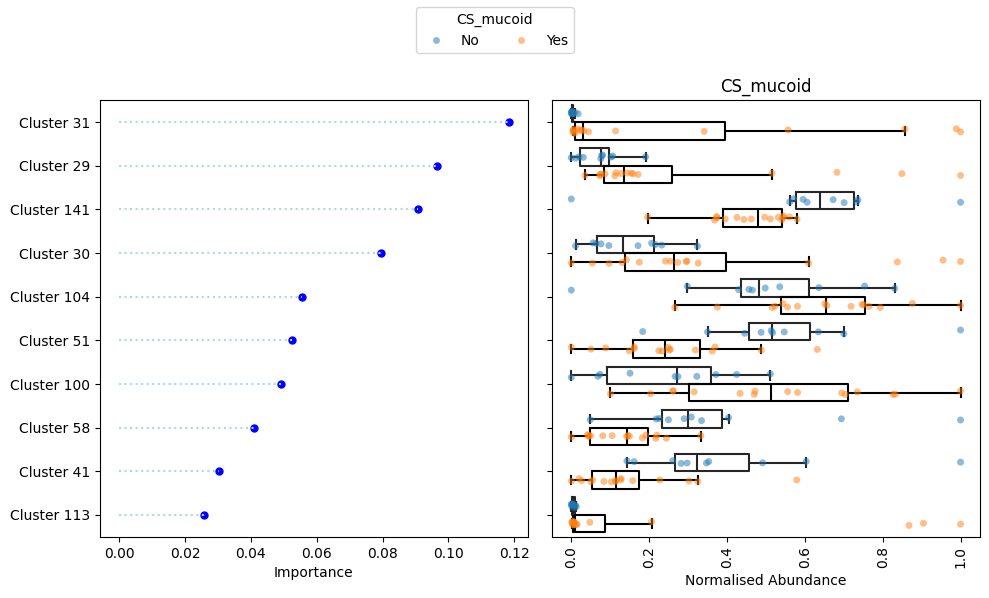

In [18]:
intcol = 'CS_mucoid'
print(f"'{intcol}' has samples from {filtered_md.groupby(intcol).size()[1]} pwCF")

# set up our titles and the filename
intcol_title = replace_index.sub('', intcol)
intcol_filename = intcol.replace(" ", "_")

# we limit this to only those samples that ALSO have Pseudomonas, so now we can see if any clusters discriminate regular from MDR Pseudomonas.
merged_df = pc_df.join(filtered_md[intcol], how='inner').dropna(subset=intcol)
print(f"We dropped some rows, so our data has shape {merged_df.shape}", file=sys.stderr)

categorical_data, custom_labels = cf_analysis_lib.create_custom_labels(metadata, intcol, merged_df)
if categorical_data is None:
    print(f"Error: {intcol} is not a numeric or categorical column. Skipped", file=sys.stderr)

X = merged_df.drop(intcol, axis=1)
y = merged_df[intcol]

met = None
if categorical_data:
  model, mse, feature_importances_sorted = cf_analysis_lib.gb_classifier_model(X, y)
  met = 'classifier'
else:
  model, mse, feature_importances_sorted = cf_analysis_lib.gb_regressor_model(X, y)
  met = 'regressor'

print(f"We used {model.n_estimators_} estimators for the random forest {met}", file=sys.stderr)
print(f"Mean squared error for {intcol} using {met} is {mse}", file=sys.stderr)

y_features = 10
topN = list(feature_importances_sorted[:y_features].index) + [intcol]
fig, axes = plt.subplots(figsize=(10, 6), nrows=1, ncols=2, sharey='row', sharex='col')
cf_analysis_lib.plot_feature_importance(axes[0], feature_importances_sorted[:y_features][::-1], "")
cf_analysis_lib.plot_feature_abundance(axes[1], merged_df[topN][::-1], intcol, intcol_title)

handles, labels = axes[1].get_legend_handles_labels()  # Get one set of handles and labels
updated_labels = labels
try:
    updated_labels = [custom_labels[float(label)] for label in labels]
except Exception as e:
    print(f"Couldn't update labels {e}.", file=sys.stderr)

for ax in axes.flat:
    if ax.get_legend() is not None:  # Check if legend exists
        ax.get_legend().remove()

plt.xticks(rotation=90)
fig.legend(handles, updated_labels, loc='upper center', ncol=2, title=intcol_title)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


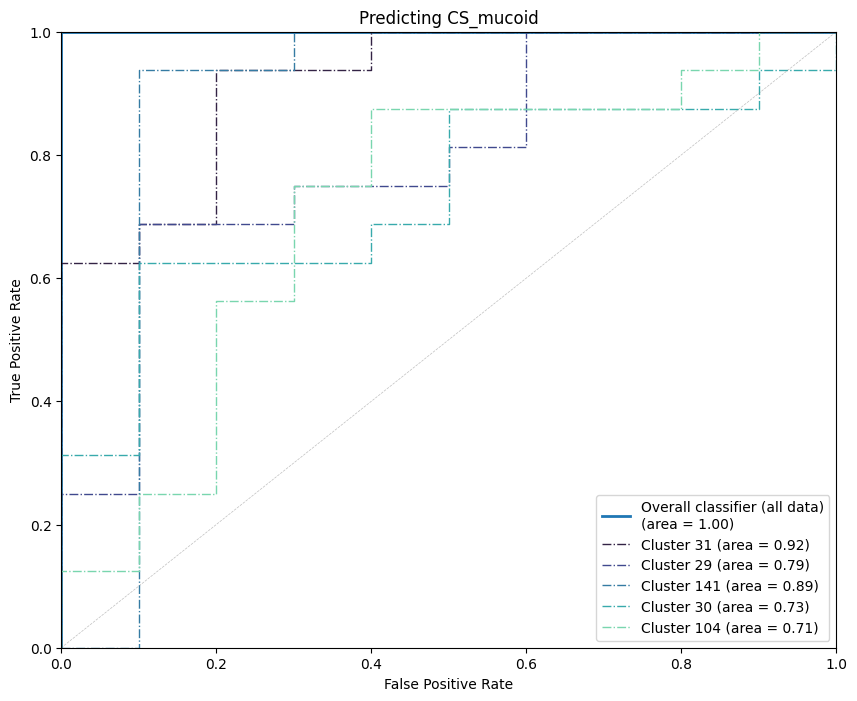

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = cf_analysis_lib.plot_roc_curves(model, X, y, feature_importances_sorted, met, intcol_title, ax=ax)
plt.show()

In [20]:
intcol = 'CS_mucoid'
interesting_cluster = 103
print(f"'{intcol}' has samples from {metadata.groupby(intcol).size()[1]} pwCF")

if isinstance(interesting_cluster, int):
    interesting_cluster_filename = f"Cluster_{interesting_cluster}"
elif 'Cluster' in interesting_cluster:
    interesting_cluster_filename = interesting_cluster.replace(" ", "_")
else:
    interesting_cluster_filename = f"Cluster_{interesting_cluster}"
intcol_filename = intcol.replace(" ", "_")
intcol_filename = replace_nonword.sub('', intcol_filename)


# make a new dir so we don't overwrite!
os.makedirs(os.path.join(outdir, "img", "clusters_manual"), exist_ok=True)

pca = PCA(n_components=2)
int_cluster_num = interesting_cluster

df_clust = df[cluster_assignments.loc[cluster_assignments["Cluster"] == int_cluster_num, "Feature"]]
# limit to only those that also have Pseudomonas
merged_df_clust = df_clust.join(filtered_md[intcol], how='inner')
df_clust = merged_df_clust.drop(intcol, axis=1)

if df_clust.shape[1] > 1:
    pca_result = pca.fit_transform(df_clust)
    pca_df = pd.DataFrame(data=pca_result, index=df_clust.index, columns=['PC1', 'PC2'])
    
    # Get loadings
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    loadings_df = pd.DataFrame(loadings, index=df_clust.columns, columns=['PC1', 'PC2'])
    
    # Create a DataFrame for top loadings
    top_loadings_df = loadings_df.loc[loadings_df['PC1'].abs().sort_values(ascending=False).index]
    top_loadings_df.head()
    
    explained_variance = pca.explained_variance_ratio_ * 100
    pc1_variance = explained_variance[0]
    pc2_variance = explained_variance[1]
    
    # don't forget to change the legend
    intcol_neg = 0
    
    colours = np.where(merged_df_clust[intcol] == intcol_neg, 'blue', 'red')
    
    # Plot the PCA results
    fig, axes = plt.subplots(figsize=(8, 11), nrows=2, ncols=1)
    ax = axes[0]
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', alpha=0.2, c=colours, ax=ax)
    ax.set_title(f"Cluster {interesting_cluster}")
    ax.set_xlabel(f'Principal Component 1 ({pc1_variance:.3f}%)')
    ax.set_ylabel(f'Principal Component 2 ({pc2_variance:.3f}%)')
    
    # add the loadings ... we only plot maxloadings here
    maxloadings = 5
    if len(loadings) < maxloadings:
        maxloadings = len(loadings)
    
    plotscaler = 2
    texts = []
    colour_cycle = cycle(mcolors.TABLEAU_COLORS)
    
    
    for i in range(maxloadings):
        c = next(colour_cycle)
        xpos = top_loadings_df.iloc[i, 0]*plotscaler
        ypos = top_loadings_df.iloc[i, 1]*plotscaler
        ax.arrow(0, 0, xpos, ypos, 
                  color=c, alpha=0.5, width=0.05)
        loading_text = top_loadings_df.index[i]
        if len(loading_text) > 30:
            loading_text = loading_text[:30] + "..."
        texts.append(ax.text(xpos, ypos, loading_text, color=c))
    
    adjust_text(texts, ax=ax)
    
    # Add a legend
    blue_patch = plt.Line2D([0], [0], marker='o', color='w', label=f'{intcol} Negative', 
                             markerfacecolor='blue', alpha=0.2, markersize=10)
    red_patch = plt.Line2D([0], [0], marker='o', color='w', label=f'{intcol} Positive', 
                            markerfacecolor='red', alpha=0.2, markersize=10)
    ax.legend(handles=[blue_patch, red_patch])
    
    ## Read abundance
    ax = axes[1]
    
    df_clust_m = merged_df_clust.melt(id_vars=intcol, var_name='Features', value_name='Normalised read abundance')
    df_clust_m = df_clust_m[df_clust_m['Normalised read abundance'] > 0]
    
    cl = {'IP': 'red', 'OP': 'blue'}
    g = sns.stripplot(data=df_clust_m, x='Features', y='Normalised read abundance', hue=intcol, dodge=True, jitter=True, ax=ax)
    custom_labels = {0: 'Negative', 1: 'Positive'}
    handles, labels = g.get_legend_handles_labels()  # Get one set of handles and labels
    updated_labels = [custom_labels[float(label)] for label in labels]
    g.get_legend().remove()
    g.legend(handles, updated_labels, loc='upper left', ncol=2, title=intcol_title)
    
    ax.tick_params(axis='x', rotation=45)
    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')
    ax.set_title(f"Read abundance for {intcol} cluster {interesting_cluster}")
    
    
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, "img", "clusters_manual", f"{intcol_filename}_{interesting_cluster_filename}.png"))
    print(f'Wrote the new image to {os.path.join(outdir, "img", "clusters_manual", f"{intcol_filename}_{interesting_cluster_filename}.png")}', file=sys.stderr)
    # Show the plot
    plt.show()
else:
    print(f"df_clust only has one column {df_clust.columns} so we can't run a PCA", file=sys.stderr)
    print(cluster_assignments.loc[cluster_assignments["Cluster"] == int_cluster_num], file=sys.stderr)

'CS_mucoid' has samples from 19 pwCF


df_clust only has one column Index(['Polyamine Metabolism'], dtype='object') so we can't run a PCA
     Cluster               Feature
694      103  Polyamine Metabolism
